In [1]:
!pip install scikit-learn
from sklearn import neighbors

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import accuracy_score


In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27814,34711,1.443955,-1.052462,-0.141721,-1.564017,-0.966274,-0.333886,-0.777060,0.023616,-2.168826,...,-0.479940,-1.165220,0.155226,-0.409701,0.179672,-0.446258,0.004329,0.000060,32.39,0.0
27815,34711,-0.263364,0.931818,1.193111,-0.507924,0.862019,0.249381,0.815449,-0.090801,-0.520583,...,-0.310112,-0.648621,-0.253746,-1.030111,-0.046091,0.107328,0.101296,-0.124600,1.49,0.0
27816,34712,0.976345,-1.024867,0.978714,0.639442,-1.413711,0.311635,-0.909035,0.232423,-0.493025,...,-0.279978,-0.599463,-0.081403,-0.059427,0.202311,-0.405753,0.055109,0.052975,151.00,0.0
27817,34712,1.464604,-0.437919,-0.018869,-1.057177,-0.154243,0.251215,-0.584866,-0.025483,-0.841369,...,-0.148384,-0.454571,-0.019732,-1.313689,0.379650,-0.368497,0.031746,0.007238,8.00,0.0
27818,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [7]:
df.isnull().sum()

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

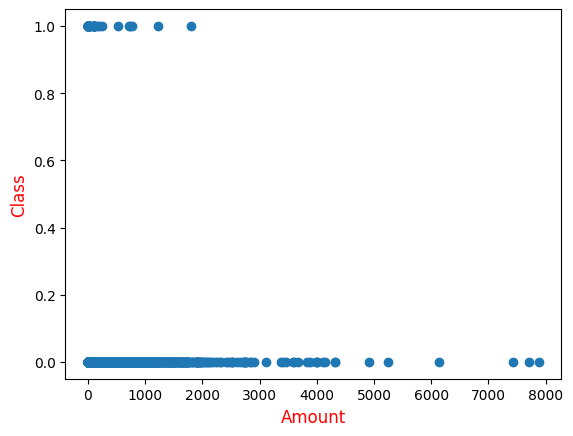

In [8]:
plt.scatter(x = 'Amount', y = 'Class', data = df)
plt.xlabel('Amount', color = 'r', fontsize = 12)
plt.ylabel('Class', color = 'r', fontsize = 12)
plt.show()

In [9]:
# sns.countplot(df['Class'])

In [10]:
# distribution of legit transactions and fraudulent transactions
df['Class'].value_counts()

Class
0.0    27725
1.0       93
Name: count, dtype: int64

**This data set is highly unbalanced**

0 --> Normal Transactions

1 --> Fraudulent Transactions

**Input Split**

In [11]:
x = df.drop(columns = 'Class', axis = 1)
y = df['Class']

**standard Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(x)

In [13]:
x_scaler

array([[-1.72213913, -0.61209923, -0.14371113, ...,  0.30511756,
        -0.09017387,  0.32926709],
       [-1.72213913,  0.75490387,  0.07555646, ..., -0.05683234,
         0.03831571, -0.33966828],
       [-1.72205485, -0.61132078, -0.96362742, ..., -0.17457707,
        -0.22915589,  1.37202866],
       ...,
       [ 1.20323221,  0.63944758, -0.75965055, ...,  0.10591342,
         0.17568863,  0.33554988],
       [ 1.20323221,  0.90102249, -0.37993246, ...,  0.04658927,
         0.01143136, -0.31549318],
       [-1.71927376,         nan,         nan, ...,         nan,
                nan,         nan]])

**Model Training**

**Split the data into training data and testing data**

In [14]:
import pandas as pd

# Load the data into a Pandas DataFrame
df = pd.DataFrame(y)

# Check for missing values
df.isnull().sum()

Class    1
dtype: int64

In [15]:
# Drop rows with missing values
df.dropna(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Extract the cleaned data
y = df.values.ravel()

In [16]:
print(x_scaler.shape)
print(y.shape)

(27819, 30)
(27818,)


In [17]:
# If x_scaler has more rows than y, drop the extra rows
if x_scaler.shape[0] > y.shape[0]:
    x_scaler = x_scaler[:y.shape[0]]

# If y has more rows than x_scaler, drop the extra rows
elif y.shape[0] > x_scaler.shape[0]:
    y = y[:x_scaler.shape[0]]

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, stratify=y, random_state=42)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train,x_test, y_train, y_test = train_test_split(x_scaler,y , test_size = 0.25, stratify = y, random_state = 42)

In [20]:
model =  LogisticRegression()


In [21]:
#Training
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Testing
y_pred = model.predict(x_test)

In [23]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6932
         1.0       0.58      0.65      0.61        23

    accuracy                           1.00      6955
   macro avg       0.79      0.83      0.81      6955
weighted avg       1.00      1.00      1.00      6955



In [24]:
print("f1_score :- ", f1_score(y_test,y_pred))

f1_score :-  0.6122448979591837


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
# Testing
y_pred = model.predict(x_test)

In [29]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6932
         1.0       0.84      0.70      0.76        23

    accuracy                           1.00      6955
   macro avg       0.92      0.85      0.88      6955
weighted avg       1.00      1.00      1.00      6955



In [30]:
print("f1_score :- ", f1_score(y_test,y_pred))

f1_score :-  0.761904761904762





#  **Balance the Class**

In [31]:
# !pip install scikit-learn==1.1.3
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [33]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

In [34]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

In [35]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

In [36]:
x_smote.shape

(41586, 30)

In [37]:
y_smote.shape

(41586,)

In [38]:
model =  LogisticRegression()

In [39]:
model.fit(x_smote, y_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [41]:
training_data_accuracy

0.9915160811005129

In [42]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy

0.9919482386772106

In [43]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6932
         1.0       0.84      0.70      0.76        23

    accuracy                           1.00      6955
   macro avg       0.92      0.85      0.88      6955
weighted avg       1.00      1.00      1.00      6955



In [44]:
print("f1_score :- ", f1_score(y_test,y_pred))

f1_score :-  0.761904761904762


In [45]:
model = RandomForestClassifier()

In [46]:
model.fit(x_smote, y_smote)

RandomForestClassifier()

In [47]:
y_pred = model.predict(x_test)

In [48]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_accuracy


1.0

In [49]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy

0.999137311286844

In [50]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6932
         1.0       0.87      0.87      0.87        23

    accuracy                           1.00      6955
   macro avg       0.93      0.93      0.93      6955
weighted avg       1.00      1.00      1.00      6955



In [51]:
print("f1_score :- ", f1_score(y_test,y_pred))

f1_score :-  0.8695652173913043


In [53]:
#Saving Model

import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
